In [1]:
# Week 1: Data Loading, Cleaning, EDA for EV Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("C:\ElectricVehicle_project\data\cars_data_RAW.csv")

print("✅ Raw dataset loaded")
df.head()


✅ Raw dataset loaded


,Row_ID,title,model,battery,price-range,0 - 100,Top Speed,Range*,Efficiency*,Fastcharge*,Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Tow_Hitch,Towing_capacity_in_kg,Number_of_seats
0,1,Tesla,Model 3,57.5,104,6.1 sec,201 km/h,415 km,139 Wh/km,690 km/h,"€41,970","€41,990","£39,990",Rear Wheel Drive,Towbar possible,1000.0,5
1,2,Tesla,Model Y,57.5,137,6.9 sec,217 km/h,350 km,164 Wh/km,580 km/h,"€45,970","€45,990","£44,990",Rear Wheel Drive,Towbar possible,1600.0,5
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€55,970","€52,990","£52,990",All Wheel Drive,Towbar possible,1600.0,5
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4 sec,201 km/h,500 km,150 Wh/km,770 km/h,"€50,970","€49,990","£49,990",All Wheel Drive,Towbar possible,1000.0,5
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9 sec,217 km/h,460 km,163 Wh/km,710 km/h,"€49,970","€49,990",NaN,Rear Wheel Drive,Towbar possible,1600.0,5


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row_ID                               353 non-null    int64  
 1   title                                353 non-null    object 
 2   model                                353 non-null    object 
 3   battery                              353 non-null    float64
 4   price-range                          353 non-null    int64  
 5   0 - 100                              353 non-null    object 
 6   Top Speed                            353 non-null    object 
 7   Range*                               353 non-null    object 
 8   Efficiency*                          353 non-null    object 
 9   Fastcharge*                          353 non-null    object 
 10  Germany_price_before_incentives      340 non-null    object 
 11  Netherlands_price_before_incenti

Row_ID                                   0
title                                    0
model                                    0
battery                                  0
price-range                              0
0 - 100                                  0
Top Speed                                0
Range*                                   0
Efficiency*                              0
Fastcharge*                              0
Germany_price_before_incentives         13
Netherlands_price_before_incentives     31
UK_price_after_incentives              106
Drive_Configuration                      0
Tow_Hitch                              116
Towing_capacity_in_kg                  125
Number_of_seats                          0
dtype: int64

In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.columns


Index(['row_id', 'title', 'model', 'battery', 'price-range', '0_-_100',
       'top_speed', 'range*', 'efficiency*', 'fastcharge*',
       'germany_price_before_incentives',
       'netherlands_price_before_incentives', 'uk_price_after_incentives',
       'drive_configuration', 'tow_hitch', 'towing_capacity_in_kg',
       'number_of_seats'],
      dtype='object')

In [5]:
df = df.fillna(df.median(numeric_only=True))
df.isnull().sum()


row_id                                   0
title                                    0
model                                    0
battery                                  0
price-range                              0
0_-_100                                  0
top_speed                                0
range*                                   0
efficiency*                              0
fastcharge*                              0
germany_price_before_incentives         13
netherlands_price_before_incentives     31
uk_price_after_incentives              106
drive_configuration                      0
tow_hitch                              116
towing_capacity_in_kg                    0
number_of_seats                          0
dtype: int64

In [8]:
price_cols = [
    "germany_price_before_incentives",
    "netherlands_price_before_incentives",
    "uk_price_after_incentives"
]

for col in price_cols:
    # Remove currency symbols, commas, and * signs
    df[col] = df[col].astype(str) \
                    .str.replace("€","", regex=False) \
                    .str.replace(",","", regex=False) \
                    .str.replace("*","", regex=False) \
                    .str.strip()

    df[col] = pd.to_numeric(df[col], errors="coerce")

    # If column has at least one numeric value → use median
    if df[col].notna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
    else:
        # If everything became NaN → fill with 0
        df[col] = df[col].fillna(0)


In [9]:
# Convert important numeric columns
num_cols = ["battery", "top_speed", "range*", "efficiency*", "towing_capacity_in_kg"]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [10]:
df = df.drop_duplicates()
df.shape


(353, 17)

In [13]:
df.to_csv("C:\ElectricVehicle_project\data\cars_data_RAW.csv", index=False)
print("✅ Cleaned dataset saved at C:\ElectricVehicle_project\data\cars_data_cleaned.csv")


✅ Cleaned dataset saved at C:\ElectricVehicle_project\data\cars_data_cleaned.csv


In [14]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   row_id                               353 non-null    int64  
 1   title                                353 non-null    object 
 2   model                                353 non-null    object 
 3   battery                              353 non-null    float64
 4   price-range                          353 non-null    int64  
 5   0_-_100                              353 non-null    object 
 6   top_speed                            0 non-null      float64
 7   range*                               0 non-null      float64
 8   efficiency*                          0 non-null      float64
 9   fastcharge*                          353 non-null    object 
 10  germany_price_before_incentives      353 non-null    float64
 11  netherlands_price_before_incenti

,row_id,title,model,battery,price-range,0_-_100,top_speed,range*,efficiency*,fastcharge*,germany_price_before_incentives,netherlands_price_before_incentives,uk_price_after_incentives,drive_configuration,tow_hitch,towing_capacity_in_kg,number_of_seats
0,1,Tesla,Model 3,57.5,104,6.1 sec,NaN,NaN,NaN,690 km/h,41970.0,41990.0,0.0,Rear Wheel Drive,Towbar possible,1000.0,5
1,2,Tesla,Model Y,57.5,137,6.9 sec,NaN,NaN,NaN,580 km/h,45970.0,45990.0,0.0,Rear Wheel Drive,Towbar possible,1600.0,5
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0 sec,NaN,NaN,NaN,670 km/h,55970.0,52990.0,0.0,All Wheel Drive,Towbar possible,1600.0,5
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4 sec,NaN,NaN,NaN,770 km/h,50970.0,49990.0,0.0,All Wheel Drive,Towbar possible,1000.0,5
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9 sec,NaN,NaN,NaN,710 km/h,49970.0,49990.0,0.0,Rear Wheel Drive,Towbar possible,1600.0,5


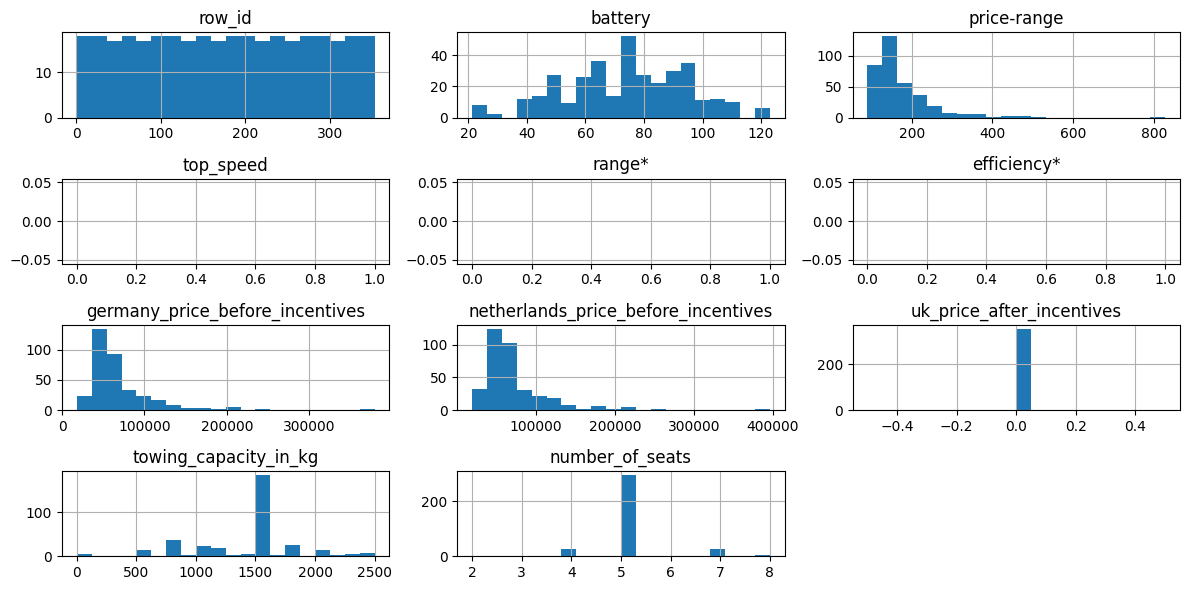

In [15]:
df.hist(figsize=(12,6), bins=20)
plt.tight_layout()
plt.show()


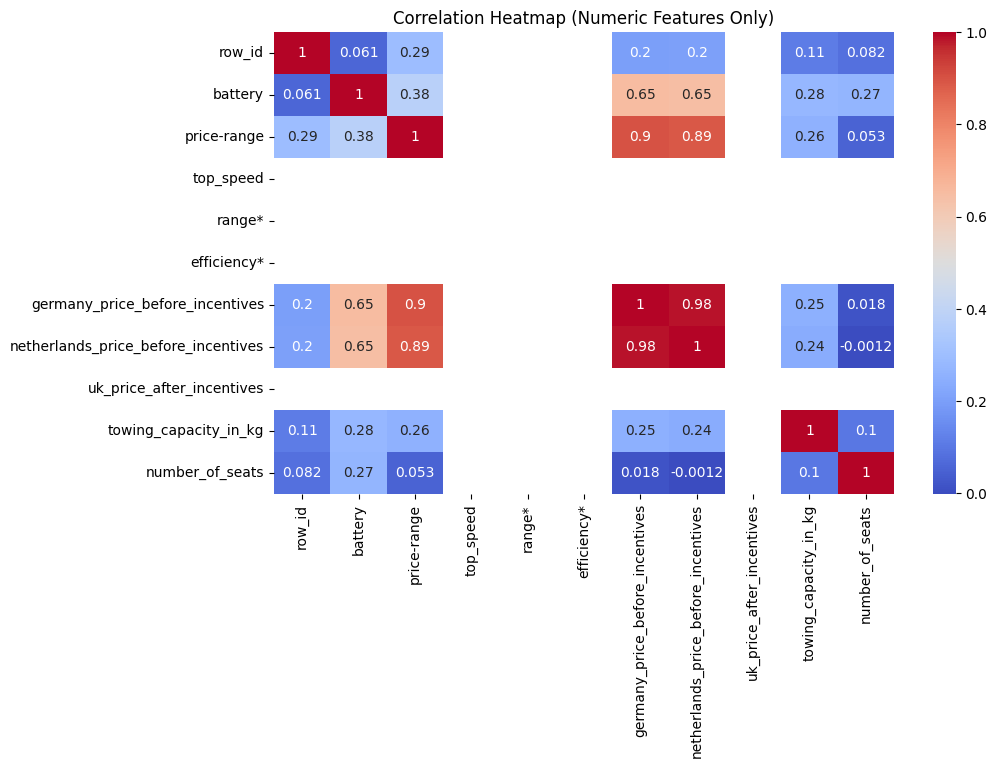

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [34]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_")
df.columns


Index(['row_id', 'title', 'model', 'battery_kwh', 'price-range', '0_-_100',
       'top_speed', 'range*', 'efficiency_km_kwh', 'fastcharge*',
       'germany_price_before_incentives',
       'netherlands_price_before_incentives', 'uk_price_after_incentives',
       'drive_configuration', 'tow_hitch', 'towing_capacity_in_kg',
       'number_of_seats'],
      dtype='object')

In [43]:
df.columns


Index(['row_id', 'title', 'model', 'battery_kwh', 'price-range', '0_-_100',
       'top_speed', 'range*', 'efficiency_km_kwh', 'fastcharge*',
       'germany_price_before_incentives',
       'netherlands_price_before_incentives', 'uk_price_after_incentives',
       'drive_configuration', 'tow_hitch', 'towing_capacity_in_kg',
       'number_of_seats'],
      dtype='object')

In [44]:
# Select features and target
model_df = df[["battery_kwh", "efficiency_km_kwh", "range*"]].copy()

# Rename target column
model_df.rename(columns={"range*": "range_km"}, inplace=True)

# Remove rows with missing values in model columns
model_df = model_df.dropna()

print("Shape after cleaning:", model_df.shape)
model_df.head()


Shape after cleaning: (0, 3)


,battery_kwh,efficiency_km_kwh,range_km


In [47]:
print(df[["battery_kwh", "efficiency_km_kwh", "range*"]].isnull().sum())
print(df.shape)


battery_kwh          0
efficiency_km_kwh    0
range*               0
dtype: int64
(0, 17)


In [53]:
df = pd.read_csv("C:\ElectricVehicle_project\data\cars_data_RAW.csv")


In [54]:
df.head()
df.shape


(353, 17)

In [56]:
df.columns


Index(['row_id', 'title', 'model', 'battery', 'price-range', '0_-_100',
       'top_speed', 'range*', 'efficiency*', 'fastcharge*',
       'germany_price_before_incentives',
       'netherlands_price_before_incentives', 'uk_price_after_incentives',
       'drive_configuration', 'tow_hitch', 'towing_capacity_in_kg',
       'number_of_seats', 'range_clean'],
      dtype='object')

In [57]:
# Clean efficiency column
df["efficiency_clean"] = (
    df["efficiency*"]
    .astype(str)
    .str.replace("km/kWh", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

df["efficiency_clean"] = pd.to_numeric(df["efficiency_clean"], errors="coerce")

# Clean range column if not already cleaned
df["range_clean"] = (
    df["range*"]
    .astype(str)
    .str.replace("km", "", regex=False)
    .str.replace("—", "", regex=False)
    .str.replace("−", "-", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

df["range_clean"] = pd.to_numeric(df["range_clean"], errors="coerce")

# Prepare features for modeling
model_df = df[["battery", "efficiency_clean", "range_clean"]].copy()

# Rename columns for clarity
model_df.rename(columns={
    "battery": "battery_kwh",
    "efficiency_clean": "efficiency_km_kwh",
    "range_clean": "range_km"
}, inplace=True)

# Drop missing rows
model_df = model_df.dropna()

print(model_df.shape)
model_df.head()


(0, 3)


,battery_kwh,efficiency_km_kwh,range_km


In [59]:
df[["battery", "efficiency*", "range*"]].head(15)
df[["battery", "efficiency*", "range*"]].isna().sum()
df.shape


(353, 19)

In [60]:
print("----- SAMPLE VALUES -----")
print(df[["battery", "efficiency*", "range*"]].head(15))

print("\n----- MISSING VALUES -----")
print(df[["battery", "efficiency*", "range*"]].isna().sum())

print("\n----- UNIQUE SAMPLE VALUES -----")
print(df["battery"].unique()[:10])
print(df["efficiency*"].unique()[:10])
print(df["range*"].unique()[:10])


----- SAMPLE VALUES -----
    battery  efficiency*  range*
0      57.5          NaN     NaN
1      57.5          NaN     NaN
2      75.0          NaN     NaN
3      75.0          NaN     NaN
4      75.0          NaN     NaN
5      60.5          NaN     NaN
6      61.7          NaN     NaN
7      82.5          NaN     NaN
8      75.0          NaN     NaN
9      80.7          NaN     NaN
10     44.0          NaN     NaN
11     71.0          NaN     NaN
12     77.0          NaN     NaN
13     60.5          NaN     NaN
14     64.0          NaN     NaN

----- MISSING VALUES -----
battery          0
efficiency*    353
range*         353
dtype: int64

----- UNIQUE SAMPLE VALUES -----
[57.5 75.  60.5 61.7 82.5 80.7 44.  71.  77.  64. ]
[nan]
[nan]


In [61]:
# Keep only battery column
df_model = df[["battery"]].copy()

# Create a synthetic range column (just for learning practice)
# Assume avg EV consumes ~0.17 kWh/km -> ~6 km per kWh
df_model["range_km"] = df_model["battery"] * 6

# Prepare features & target
X = df_model[["battery"]]
y = df_model["range_km"]

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)
print("First 5 predictions:", pred[:5])


Model Coefficient: [6.]
Model Intercept: -2.2737367544323206e-13
First 5 predictions: [240.  348.  487.2 654.  423. ]
